In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as model_selection
from sklearn.metrics import r2_score

In [ ]:
data= pd.read_csv('/content/Advertising.csv')

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data=data.drop(columns= ['Unnamed: 0'])

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.shape

(200, 4)

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Data Cleansing

In [ ]:
# drop all NaN values
data= data.dropna()

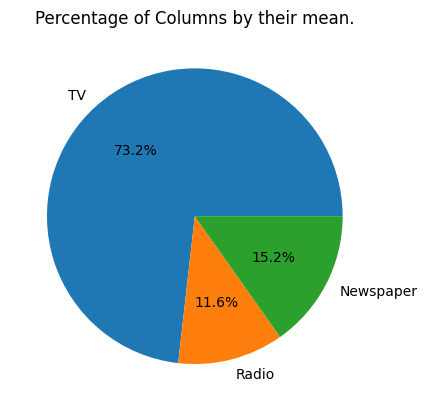

In [ ]:
col = ['TV', 'Radio', 'Newspaper', 'Sales']
df = data[col]

df_cleaned = df.dropna()

column_means = df_cleaned.drop(columns='Sales').mean()

percentages = (column_means / df_cleaned['Sales'].mean()) * 100

plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%')
plt.title('Percentage of Columns by their mean.')
plt.show()


MACHINE LEARNING MODEL

Split the dataframe into 2 for training and testing purpose.
Perform linear regression.

In [ ]:
x=data['TV'].values.reshape(-1,1)
y=data['Sales'].values.reshape(-1,1)
x_train, x_test, y_train, y_test= model_selection.train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=90)


In [ ]:
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred= lin_reg.predict(x_test)

Linear Regression Model

In [ ]:
r2_score(y_test,y_pred)

0.40705407795780524

Text(0, 0.5, 'Predicted Values')

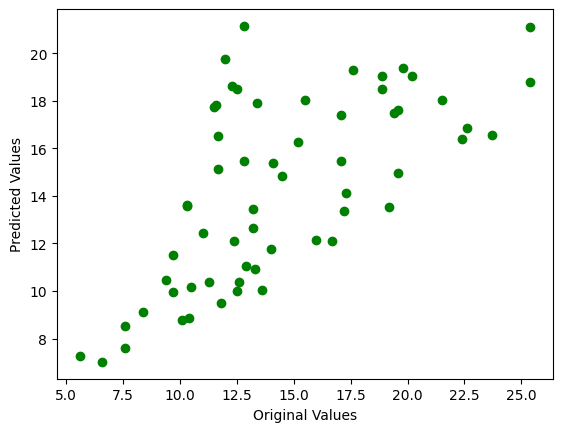

In [ ]:
plt.scatter(y_test, y_pred, c='g')
plt.xlabel("Original Values")
plt.ylabel("Predicted Values")

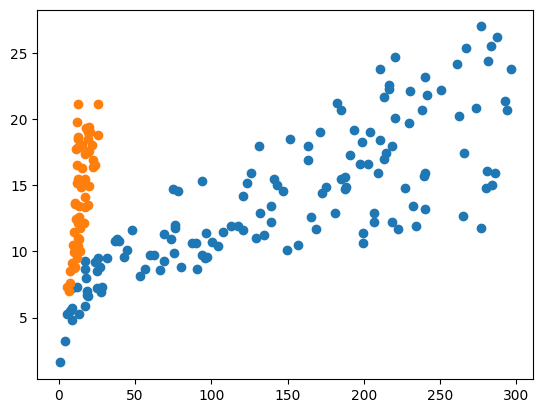

In [ ]:
plt.scatter(x_train,y_train)
plt.scatter(y_test,y_pred)

In [ ]:
Y= y_test.reshape(-1)
Y_p= y_pred.reshape(-1)

print(Y.shape)
print(Y_p.shape)

(60,)
(60,)


In [ ]:
pred_df=pd.DataFrame({'Actual Value':Y,'Predicted Value':Y_p,'Difference':Y-Y_p})
pred_df

,Actual Value,Predicted Value,Difference
0,19.6,14.961604,4.638396
1,22.4,16.391094,6.008906
2,11.3,10.388237,0.911763
3,13.3,10.908051,2.391949
4,17.6,19.310051,-1.710051
5,9.4,10.443217,-1.043217
6,13.6,10.043360,3.556640
7,10.5,10.153321,0.346679
8,12.9,11.038005,1.861995
9,12.5,10.013371,2.486629


<Axes: >

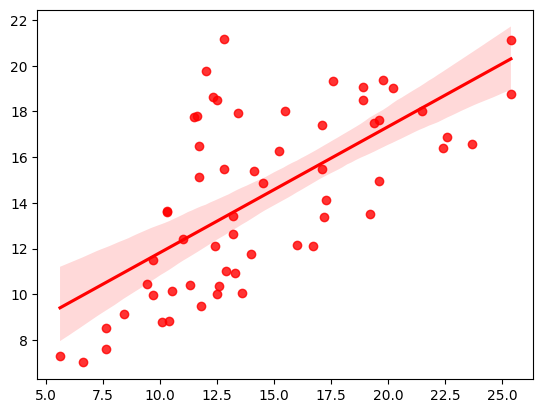

In [ ]:
sns.regplot(x=Y, y=Y_p, color='red')